In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
import warnings
from datetime import datetime

In [2]:
warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('D:\Documents Backup\Semester 3\PAI\PAI Theory/TATAMOTORS.csv')
data['Date'] = pd.to_datetime(data['Date'], infer_datetime_format = True)
data = data.set_index(['Date'])
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,TELCO,EQ,201.60,207.4,217.25,207.4,217.0,216.75,214.28,676126,1.448775e+13,NaN,NaN,NaN
2000-01-04,TELCO,EQ,216.75,217.0,219.00,206.0,211.9,208.20,209.50,679215,1.422962e+13,NaN,NaN,NaN
2000-01-05,TELCO,EQ,208.20,194.0,217.80,194.0,213.1,213.25,210.33,1120951,2.357684e+13,NaN,NaN,NaN
2000-01-06,TELCO,EQ,213.25,215.0,229.90,215.0,222.0,222.10,225.29,1968998,4.435932e+13,NaN,NaN,NaN
2000-01-07,TELCO,EQ,222.10,224.0,239.90,223.1,239.9,239.90,236.32,2199431,5.197636e+13,NaN,NaN,NaN


In [4]:
data.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2021-04-26,TATAMOTORS,EQ,294.0,297.0,299.0,294.60,295.85,295.40,296.48,30583139,9.067386e+14,173282.0,3291167.0,0.1076
2021-04-27,TATAMOTORS,EQ,295.4,295.7,302.5,295.10,302.10,301.50,299.05,35040532,1.047879e+15,191627.0,5215100.0,0.1488
2021-04-28,TATAMOTORS,EQ,301.5,303.5,309.5,303.00,305.15,305.90,307.22,44668126,1.372278e+15,264159.0,5116568.0,0.1145
2021-04-29,TATAMOTORS,EQ,305.9,308.9,310.0,301.25,302.20,301.90,304.77,36647292,1.116900e+15,186996.0,4193346.0,0.1144
2021-04-30,TATAMOTORS,EQ,301.9,298.2,301.3,292.55,293.10,293.85,297.01,36121668,1.072849e+15,227806.0,7898988.0,0.2187


In [5]:
data = data.drop(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'], axis=1)

In [6]:
null = pd.isnull(data["Close"])
data[null]

,Close
Date,


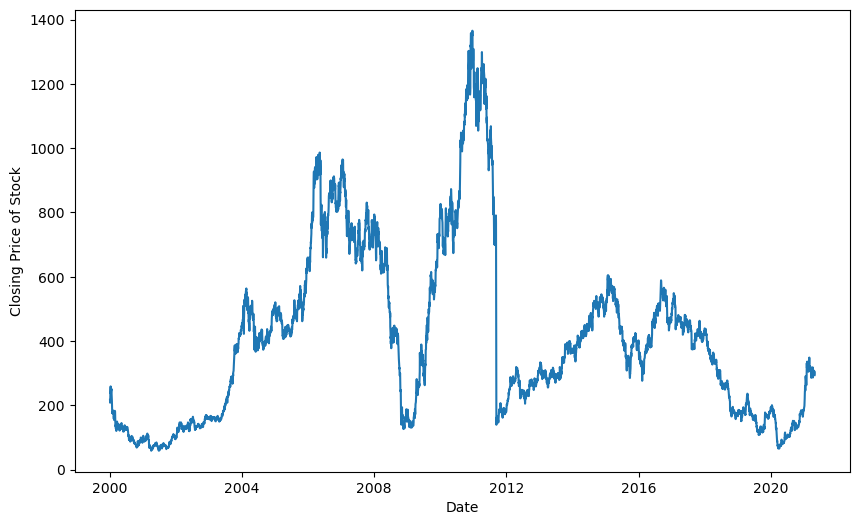

In [7]:
plt.xlabel("Date")
plt.ylabel("Closing Price of Stock")
plt.plot(data)

In [8]:
rolmean = data.rolling(window = 365).mean()
rolstd = data.rolling(window = 365).std()
print(rolmean, rolstd)

                 Close
Date                  
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
...                ...
2021-04-26  168.161370
2021-04-27  168.517534
2021-04-28  168.892466
2021-04-29  169.248356
2021-04-30  169.586027

[5306 rows x 1 columns]                 Close
Date                 
2000-01-03        NaN
2000-01-04        NaN
2000-01-05        NaN
2000-01-06        NaN
2000-01-07        NaN
...               ...
2021-04-26  75.409186
2021-04-27  75.731310
2021-04-28  76.071947
2021-04-29  76.389719
2021-04-30  76.667611

[5306 rows x 1 columns]


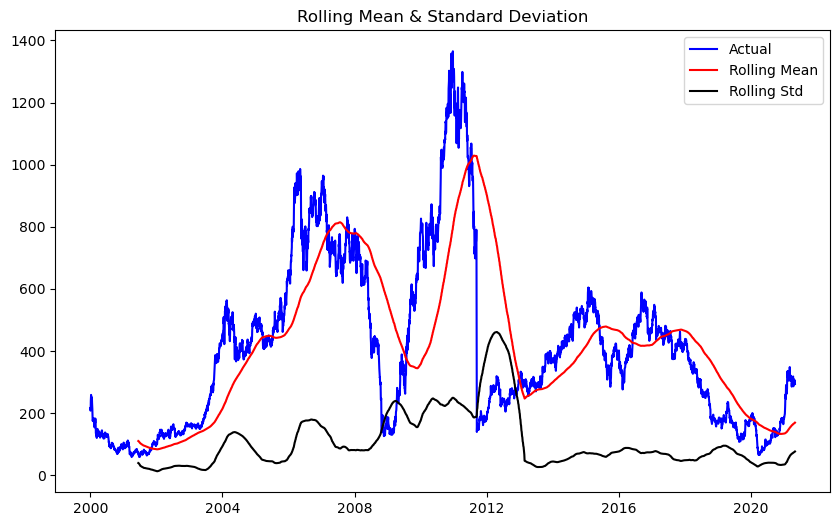

In [9]:
actual = plt.plot(data, color = 'blue', label = 'Actual')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'black', label = 'Rolling Std')
plt.legend(loc = 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block = False)

In [10]:
from statsmodels.tsa.stattools import adfuller
print("Results of Dickey-Fuller Test:")
dftest =  adfuller(data)
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observatoins Used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' % key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   -2.307609
p-value                           0.169526
#Lags Used                       22.000000
Number of Observatoins Used    5283.000000
Critical Value (1%)              -3.431588
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


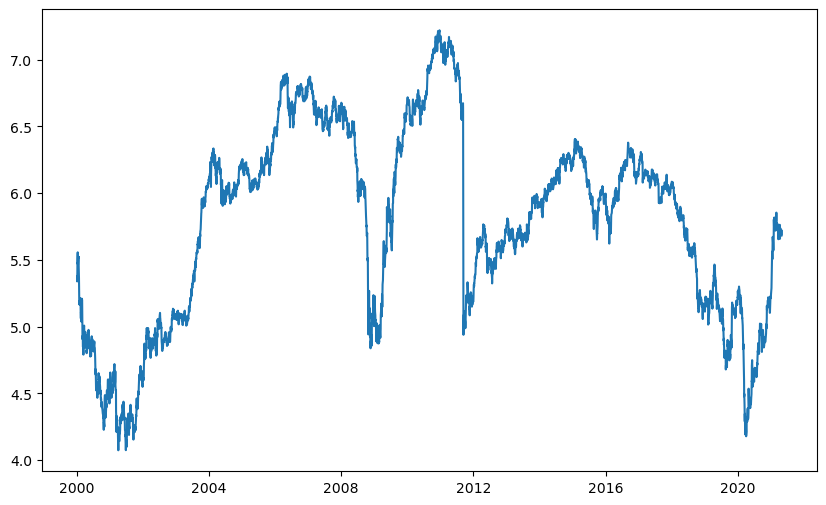

In [11]:
data_logscale = np.log(data)
plt.plot(data_logscale)

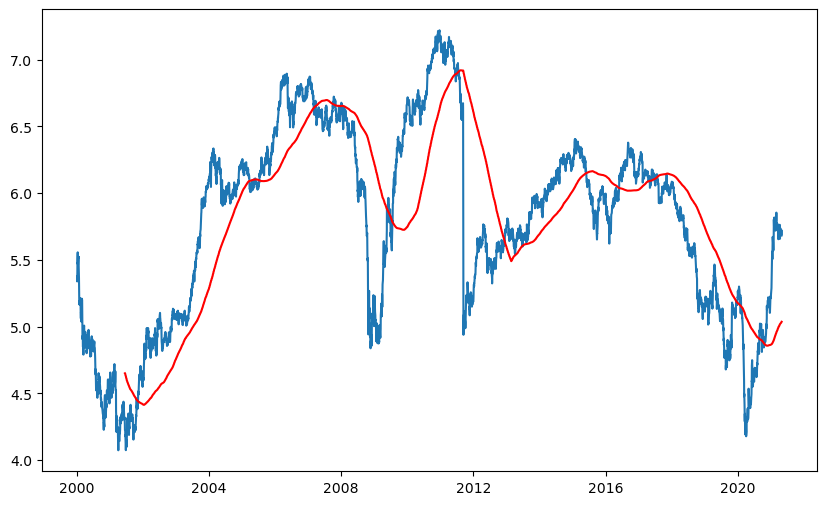

In [12]:
MA = data_logscale.rolling(window = 365).mean()
MSTD = data_logscale.rolling(window = 365).std()
plt.plot(data_logscale)
plt.plot(MA, color = 'red')

In [13]:
data_logscaleMinusMA = data_logscale - MA
data_logscaleMinusMA.head()
data_logscaleMinusMA.dropna(inplace = True)
data_logscaleMinusMA.head()

,Close
Date,
2001-06-15,-0.425295
2001-06-18,-0.424325
2001-06-19,-0.465333
2001-06-20,-0.452213
2001-06-21,-0.474930


In [14]:
def check_stationarity(timeseries):
    MA = timeseries.rolling(window = 365).mean()
    MSTD = timeseries.rolling(window = 365).std()
    
    actual = plt.plot(timeseries, color = 'blue', label = 'Actual')
    mean = plt.plot(MA, color = 'red', label = 'Rolling Mean')
    std = plt.plot(MSTD, color = 'black', label = 'Rolling Std')
    plt.legend(loc = 'best')
    plt.title("Rolling Mean & Standard Deviation")
    plt.show(block = False)
    
    print("Results of Dickey-Fuller Test:")
    dftest =  adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observatoins Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

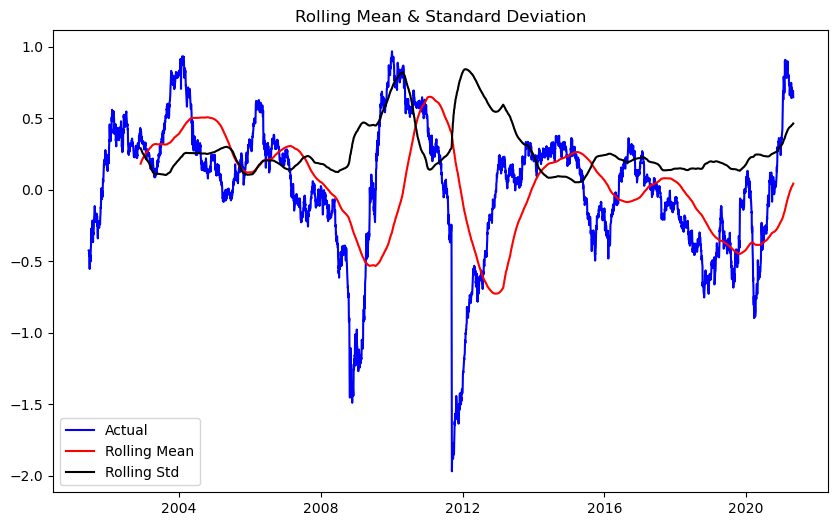

Results of Dickey-Fuller Test:
Test Statistic                   -3.100206
p-value                           0.026538
#Lags Used                       20.000000
Number of Observatoins Used    4921.000000
Critical Value (1%)              -3.431680
Critical Value (5%)              -2.862128
Critical Value (10%)             -2.567083
dtype: float64


In [15]:
check_stationarity(data_logscaleMinusMA)

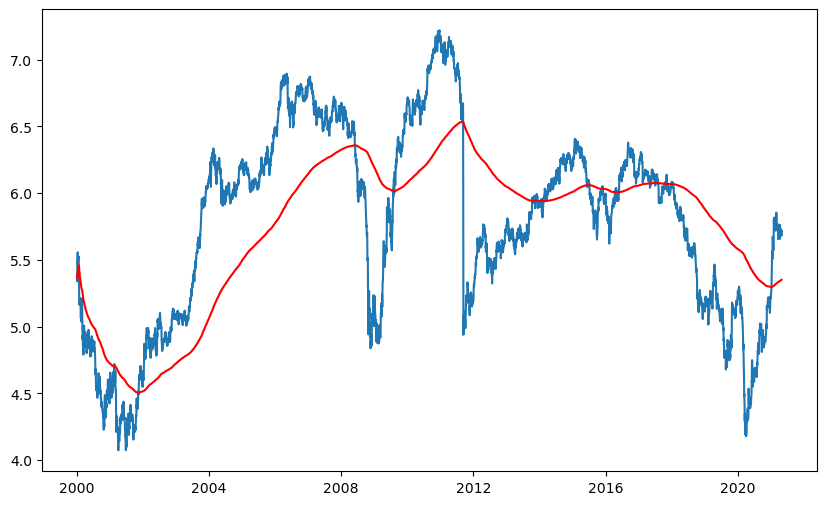

In [16]:
EDWA = data_logscale.ewm(halflife = 365, min_periods = 1, adjust = True).mean()
plt.plot(data_logscale)
plt.plot(EDWA, color = 'red')

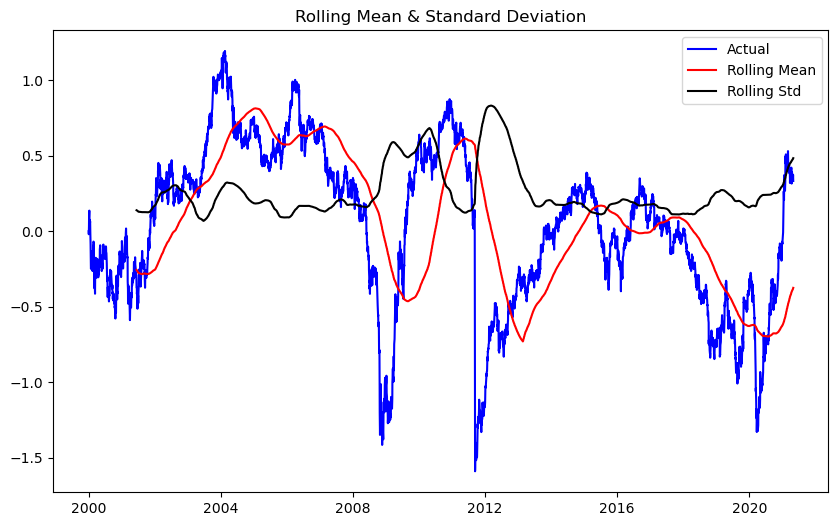

Results of Dickey-Fuller Test:
Test Statistic                   -2.785871
p-value                           0.060320
#Lags Used                       20.000000
Number of Observatoins Used    5285.000000
Critical Value (1%)              -3.431588
Critical Value (5%)              -2.862087
Critical Value (10%)             -2.567061
dtype: float64


In [17]:
data_logscaleMinusMEDA = data_logscale - EDWA
data_logscaleMinusMEDA.dropna(inplace = True)
check_stationarity(data_logscaleMinusMEDA)

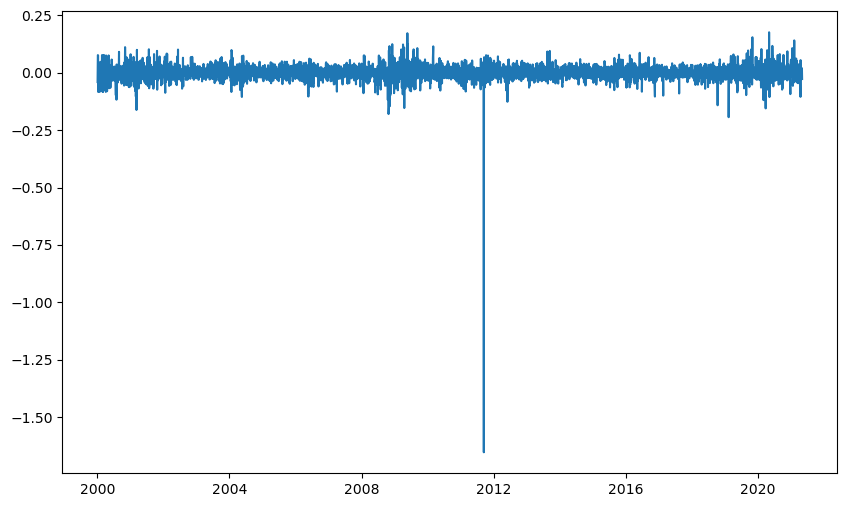

In [18]:
data_logDS = data_logscale - data_logscale.shift()
plt.plot(data_logDS)

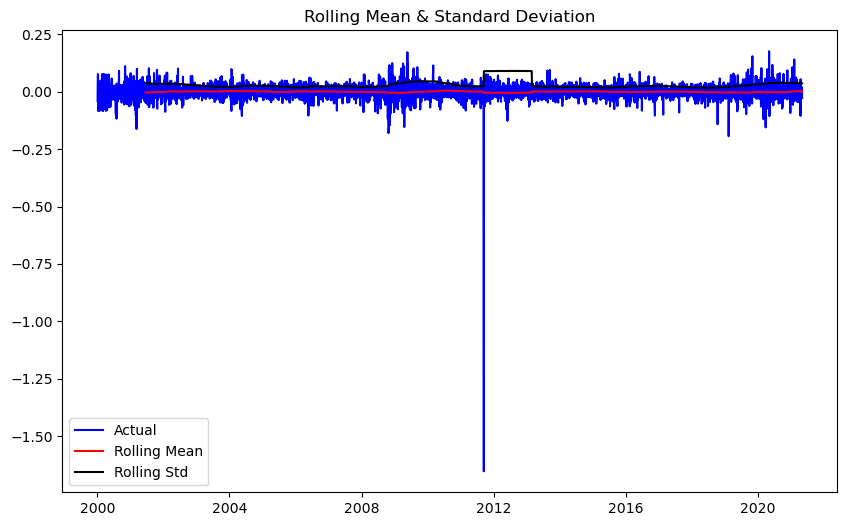

Results of Dickey-Fuller Test:
Test Statistic                -1.547709e+01
p-value                        2.584869e-28
#Lags Used                     1.900000e+01
Number of Observatoins Used    5.285000e+03
Critical Value (1%)           -3.431588e+00
Critical Value (5%)           -2.862087e+00
Critical Value (10%)          -2.567061e+00
dtype: float64


In [19]:
data_logDS.dropna(inplace = True)
check_stationarity(data_logDS)

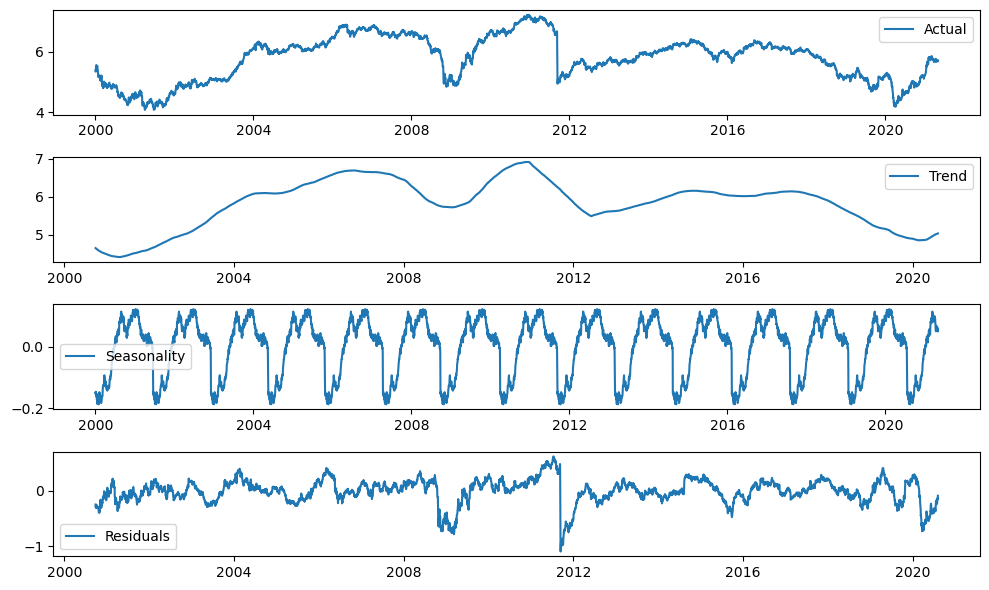

In [20]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(data_logscale, period = 365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(data_logscale, label = 'Actual')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')
           
plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residuals')
plt.legend(loc = 'best')

plt.tight_layout()

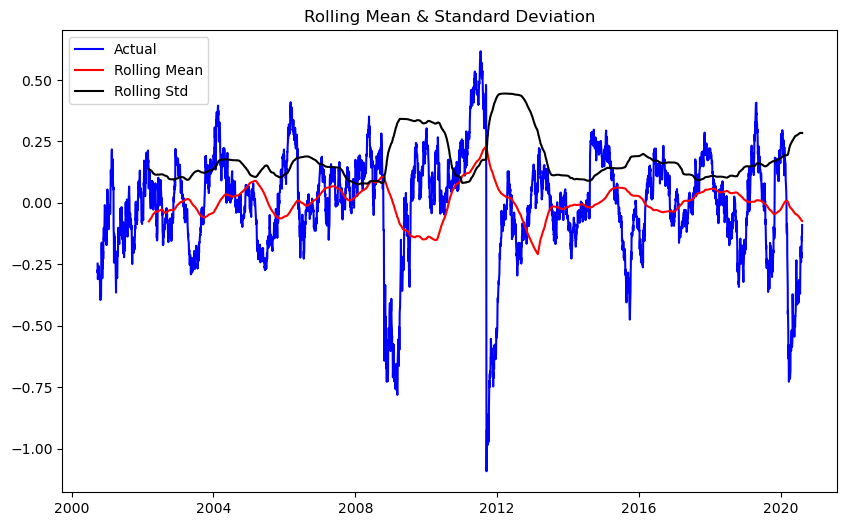

Results of Dickey-Fuller Test:
Test Statistic                -6.344323e+00
p-value                        2.706310e-08
#Lags Used                     2.200000e+01
Number of Observatoins Used    4.919000e+03
Critical Value (1%)           -3.431680e+00
Critical Value (5%)           -2.862128e+00
Critical Value (10%)          -2.567083e+00
dtype: float64


In [21]:
decomposedData = residual
decomposedData.dropna(inplace = True)
check_stationarity(decomposedData)

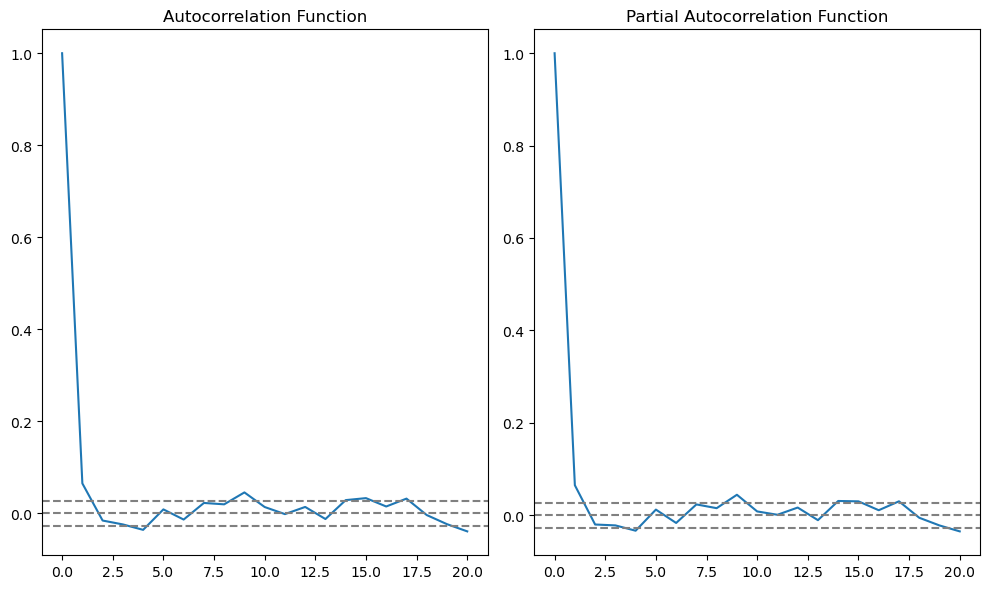

In [22]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(data_logDS, nlags = 20)
lag_pacf = pacf(data_logDS, nlags = 20, method = 'ols')

plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(data_logDS)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(data_logDS)), linestyle = '--', color = 'grey')
plt.title('Autocorrelation Function')


plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y = 0, linestyle = '--', color = 'grey')
plt.axhline(y = -1.96/np.sqrt(len(data_logDS)), linestyle = '--', color = 'grey')
plt.axhline(y = 1.96/np.sqrt(len(data_logDS)), linestyle = '--', color = 'grey')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [23]:
from statsmodels.tsa.stattools import arma_order_select_ic
arma_order_select_ic(data_logDS)

C:\Users\Ayan\Downloads\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


{'bic':               0             1             2
 0 -20035.255117 -20049.676864 -20042.138361
 1 -20048.911710 -20041.769651 -20036.094297
 2 -20042.535329 -20033.809039 -20033.316766
 3 -20036.592854 -20027.745806 -20022.583716
 4 -20034.079553 -20025.636582 -20017.105645,
 'bic_min_order': (0, 1)}

C:\Users\Ayan\Downloads\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ayan\Downloads\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Ayan\Downloads\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Ploting ARIMA model


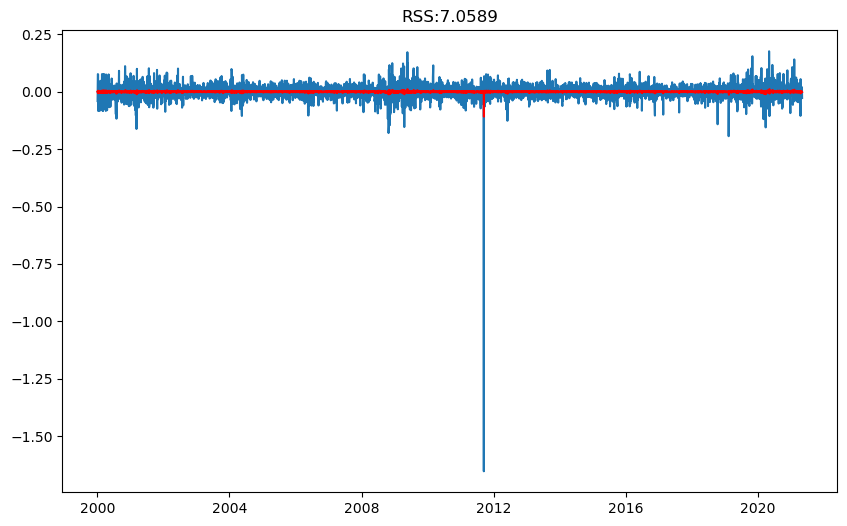

In [24]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(data_logDS,order=(0,0,1))
results_ARIMA = model.fit()
plt.plot(data_logDS)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title('RSS:%.4f'% sum((results_ARIMA.fittedvalues-data_logDS['Close'])**2))
print('Ploting ARIMA model')

In [25]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Date
2000-01-04    0.000054
2000-01-05   -0.002576
2000-01-06    0.001794
2000-01-07    0.002602
2000-01-10    0.004937
dtype: float64


In [26]:
predictions_ARIMA_diff_cumsum =predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2000-01-04    0.000054
2000-01-05   -0.002522
2000-01-06   -0.000728
2000-01-07    0.001874
2000-01-10    0.006811
dtype: float64


In [27]:
predictions_ARIMA_log = pd.Series(data_logscale['Close'], index = data_logscale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value = 0)
predictions_ARIMA_log.head()

Date
2000-01-03    5.378745
2000-01-04    5.338553
2000-01-05    5.359944
2000-01-06    5.402400
2000-01-07    5.482096
dtype: float64

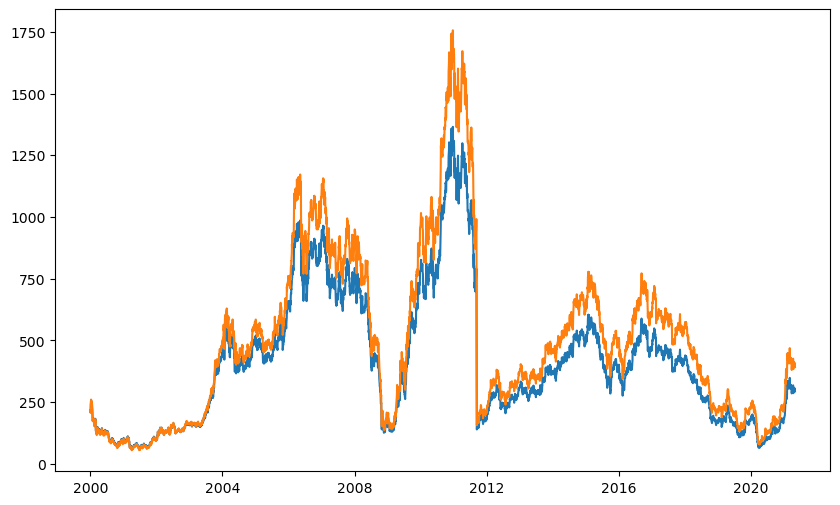

In [28]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
predictions_ARIMA.head()
plt.plot(data)
plt.plot(predictions_ARIMA)

In [29]:
data_logscale.head()

,Close
Date,
2000-01-03,5.378745
2000-01-04,5.338499
2000-01-05,5.362465
2000-01-06,5.403128
2000-01-07,5.480222


In [30]:
# future Predictions

from statsmodels.graphics.tsaplots import plot_predict
results_ARIMA.forecast(steps = 720)

C:\Users\Ayan\Downloads\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


5305   -0.001660
5306    0.000054
5307    0.000054
5308    0.000054
5309    0.000054
          ...   
6020    0.000054
6021    0.000054
6022    0.000054
6023    0.000054
6024    0.000054
Name: predicted_mean, Length: 720, dtype: float64